### SPARK_DATAFRAME Project

In [1]:
sample_lines = []
with open('census_2010.json') as f:
    for i in range(10):
        formmatted_lines = f.readline().strip()
        sample_lines.append(formmatted_lines)

print(sample_lines)
    

['{"females": 1994141, "total": 4079669, "males": 2085528, "age": 0, "year": 2010}', '{"females": 1997991, "total": 4085341, "males": 2087350, "age": 1, "year": 2010}', '{"females": 2000746, "total": 4089295, "males": 2088549, "age": 2, "year": 2010}', '{"females": 2002756, "total": 4092221, "males": 2089465, "age": 3, "year": 2010}', '{"females": 2004366, "total": 4094802, "males": 2090436, "age": 4, "year": 2010}', '{"females": 2005925, "total": 4097728, "males": 2091803, "age": 5, "year": 2010}', '{"females": 2007781, "total": 4101686, "males": 2093905, "age": 6, "year": 2010}', '{"females": 2010281, "total": 4107361, "males": 2097080, "age": 7, "year": 2010}', '{"females": 2013771, "total": 4115441, "males": 2101670, "age": 8, "year": 2010}', '{"females": 2018603, "total": 4126617, "males": 2108014, "age": 9, "year": 2010}']


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CensusAnalysis").getOrCreate()
df = spark.read.json('census_2010.json')
df.show(10)


+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
+---+-------+-------+-------+----+
only showing top 10 rows


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CensusAnalysis").getOrCreate()
df = spark.read.json("census_2010.json")
print(df.printSchema())
column_names = df.columns
column_types = df.dtypes
print(list(column_names))
print(list(column_types))

root
 |-- age: long (nullable = true)
 |-- females: long (nullable = true)
 |-- males: long (nullable = true)
 |-- total: long (nullable = true)
 |-- year: long (nullable = true)

None
['age', 'females', 'males', 'total', 'year']
[('age', 'bigint'), ('females', 'bigint'), ('males', 'bigint'), ('total', 'bigint'), ('year', 'bigint')]


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CensusAnalysis").getOrCreate()
df = spark.read.json("census_2010.json")
age_dot = df.age
age_bracket = df["age"]
age_selected = df.select("age")
age_selected.show(5)

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+
only showing top 5 rows


In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col 
spark = SparkSession.builder.appName("CensusAnalysis").getOrCreate()
df = spark.read.json("census_2010.json")
df_with_ratio = df.withColumn("female_male_ratio",col("females") / col("males"))
ratio_preview = df_with_ratio.select("age","females","males","female_male_ratio")
ratio_preview.show(10)                              

+---+-------+-------+------------------+
|age|females|  males| female_male_ratio|
+---+-------+-------+------------------+
|  0|1994141|2085528|0.9561804013180355|
|  1|1997991|2087350|0.9571902172611205|
|  2|2000746|2088549|0.9579598084603234|
|  3|2002756|2089465|0.9585018174508786|
|  4|2004366|2090436|0.9588267710659403|
|  5|2005925|2091803|0.9589454647497876|
|  6|2007781|2093905|0.9588691941611487|
|  7|2010281|2097080|0.9586095904781887|
|  8|2013771|2101670| 0.958176592899932|
|  9|2018603|2108014|0.9575851963032503|
+---+-------+-------+------------------+
only showing top 10 rows


In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName("CensusAnalysis").getOrCreate()
df = spark.read.json("census_2010.json")
df_with_ratio = df.withColumn("female_male_ratio", col("females") / col("males"))
female_majority_df = df_with_ratio.filter(col("female_male_ratio") > 1.0)
female_majority_preview = female_majority_df.select("age", "females", "males", "female_male_ratio")
female_majority_preview.show(10)

+---+-------+-------+------------------+
|age|females|  males| female_male_ratio|
+---+-------+-------+------------------+
| 34|2025969|2020204|1.0028536722034012|
| 35|2029981|2018080| 1.005897189407754|
| 36|2036269|2018137| 1.008984523845507|
| 37|2045241|2022787|1.0111005261552501|
| 38|2056401|2032469|1.0117748413382934|
| 39|2070132|2046398| 1.011597939403772|
| 40|2085229|2061474|1.0115233080795587|
| 41|2099423|2076069|1.0112491444166836|
| 42|2123189|2098014|1.0119994432830286|
| 43|2160806|2130169| 1.014382426934201|
+---+-------+-------+------------------+
only showing top 10 rows


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,when
from pyspark.sql.functions import sum

spark = SparkSession.builder.appName("CensusAnalysis").getOrCreate()
df = spark.read.json("census_2010.json")
df_with_ratio = df.withColumn("female_male_ratio", col("females") / col("males"))
df_categorized = df_with_ratio.withColumn(
    "age_group",
    when(col("age") < 18, "Minor")
    .when(col("age") < 65, "Working Age")
    .otherwise("Retirement Age")
)
age_group_totals = df_categorized.groupBy("age_group").agg(sum("total").alias("group_population"))
age_group_totals.show()
                                                           

+--------------+----------------+
|     age_group|group_population|
+--------------+----------------+
|   Working Age|       196296661|
|         Minor|        75156171|
|Retirement Age|        40794284|
+--------------+----------------+



In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName("CensusAnalysis").getOrCreate()
df = spark.read.json("census_2010.json")
df_with_ratio = df.withColumn("female_male_ratio", col("females") / col("males"))
youth_analysis = (df_with_ratio.withColumn("gender_gap",col("females") - col("males"))
                  .filter(col("age") < 18)
                  .select("age","total","gender_gap","female_male_ratio")
                  .orderBy("age")
                 )
youth_analysis.show(10)

+---+-------+----------+------------------+
|age|  total|gender_gap| female_male_ratio|
+---+-------+----------+------------------+
|  0|4079669|    -91387|0.9561804013180355|
|  1|4085341|    -89359|0.9571902172611205|
|  2|4089295|    -87803|0.9579598084603234|
|  3|4092221|    -86709|0.9585018174508786|
|  4|4094802|    -86070|0.9588267710659403|
|  5|4097728|    -85878|0.9589454647497876|
|  6|4101686|    -86124|0.9588691941611487|
|  7|4107361|    -86799|0.9586095904781887|
|  8|4115441|    -87899| 0.958176592899932|
|  9|4126617|    -89411|0.9575851963032503|
+---+-------+----------+------------------+
only showing top 10 rows


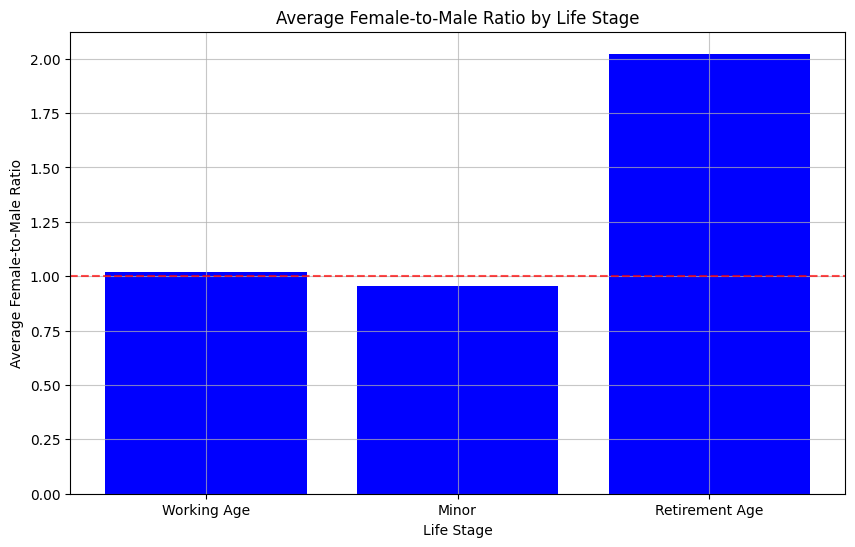

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, avg
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("CensusAnalysis").getOrCreate()
df = spark.read.json("census_2010.json")

# Create categories and calculate average ratios per category
category_ratios = (df
    .withColumn("female_male_ratio", col("females") / col("males"))
    .withColumn("age_group", 
        when(col("age") < 18, "Minor")
        .when(col("age") < 65, "Working Age")
        .otherwise("Retirement Age"))
    .groupBy("age_group")
    .agg(avg("female_male_ratio").alias("avg_ratio"))
)
category_pandas = category_ratios.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(category_pandas['age_group'],category_pandas['avg_ratio'],color='blue')
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
plt.title("Average Female-to-Male Ratio by Life Stage")
plt.xlabel('Life Stage')
plt.ylabel('Average Female-to-Male Ratio')
plt.grid(True, alpha=0.7)
plt.show()